<a href="https://colab.research.google.com/github/Aziz-bensalem/CNN-model/blob/main/hatespeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow scikit-learn matplotlib numpy gradio pandas

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr
import pandas as pd

In [ ]:
import kagglehub
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

Using Colab cache for faster access to the 'hate-speech-and-offensive-language-dataset' dataset.


In [ ]:
import os
print(os.listdir(path))
csv_file_name = 'labeled_data.csv'
full_csv_path = os.path.join(path, csv_file_name)

df = pd.read_csv(full_csv_path)
print(df.head())
print(df.info())

['labeled_data.csv']
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   U

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


<Axes: xlabel='class', ylabel='count'>

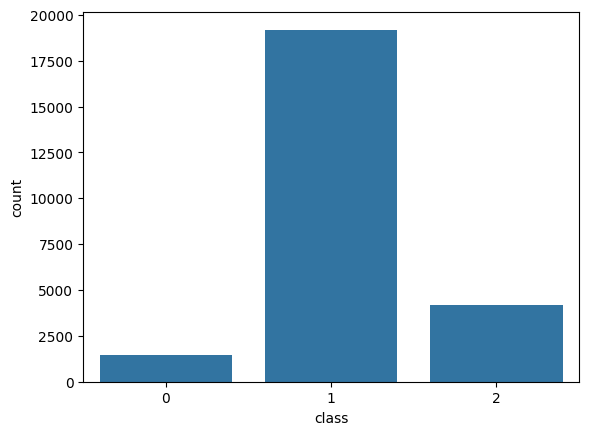

In [ ]:
import seaborn as sns
sns.countplot(x='class', data=df)

In [ ]:
df['label'] = df['class'].apply(lambda x: 0 if x == 2 else 1)
df = df[['tweet', 'label']]
df.columns = ['comment', 'label']

X_train, X_test, y_train, y_test = train_test_split(
    df['comment'], df['label'], test_size=0.2, random_state=42
)

)MAX_WORDS = 10000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Train samples padded shape: {X_train_padded.shape}")
print(f"Test samples padded shape: {X_test_padded.shape}"


Train samples padded shape: (19826, 100)
Test samples padded shape: (4957, 100)


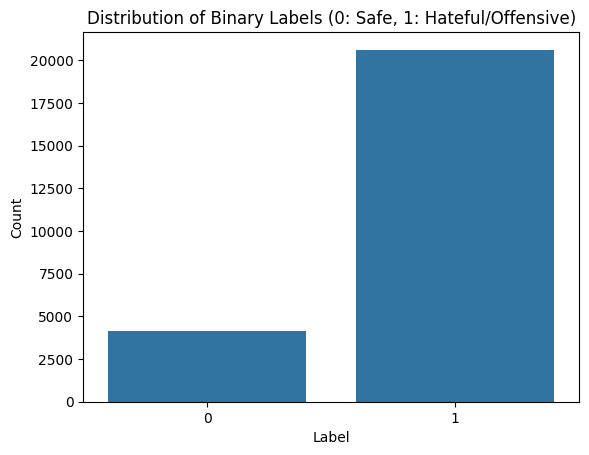

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=df)
plt.title('Distribution of Binary Labels (0: Safe, 1: Hateful/Offensive)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
EMBEDDING_DIM = 16
NUM_EPOCHS = 10

model = Sequential([
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),

    GlobalAveragePooling1D(),

    Dense(24, activation='relu'),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

print("\nTraining Model...")
history = model.fit(
    X_train_padded,
    y_train,
    epochs=NUM_EPOCHS,
    validation_data=(X_test_padded, y_test),
    verbose=1
)

Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training Model...
Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8229 - loss: 0.4647 - val_accuracy: 0.8318 - val_loss: 0.4088
Epoch 2/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8392 - loss: 0.3725 - val_accuracy: 0.8804 - val_loss: 0.2631
Epoch 3/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8909 - loss: 0.2379 - val_accuracy: 0.9239 - val_loss: 0.1993
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9320 - loss: 0.1688 - val_accuracy: 0.9352 - val_loss: 0.1628
Epoch 5/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9462 - loss: 0.1381 - val_accuracy: 0.9248 - val_loss: 0.1614
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9549 - loss: 0.1167 - val_accuracy: 0.9419 - val_loss: 0.1555
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9631 - loss: 0.1009 - val_accuracy: 0.9506 - val_loss: 0.1395
Epoch 8/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9617 - loss: 0.1004

In [ ]:
y_pred_proba = model.predict(X_test_padded)

y_pred_classes = (y_pred_proba > 0.5).astype(int)

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


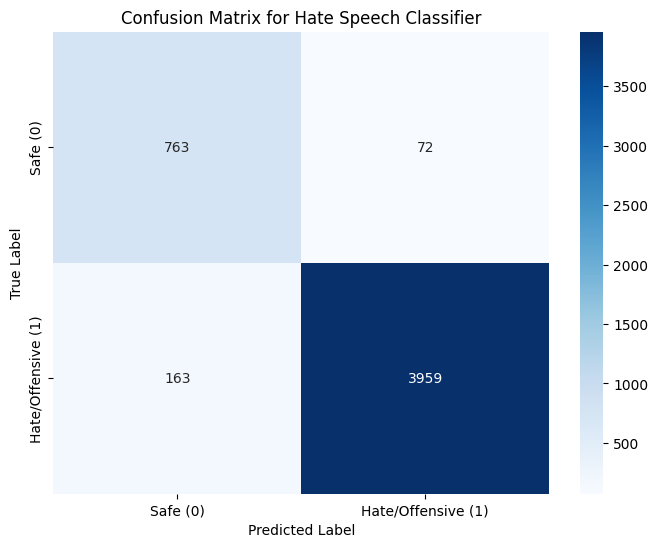


Classification Report:

                    precision    recall  f1-score   support

          Safe (0)       0.82      0.91      0.87       835
Hate/Offensive (1)       0.98      0.96      0.97      4122

          accuracy                           0.95      4957
         macro avg       0.90      0.94      0.92      4957
      weighted avg       0.96      0.95      0.95      4957



In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
class_names = ['Safe (0)', 'Hate/Offensive (1)']
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix for Hate Speech Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

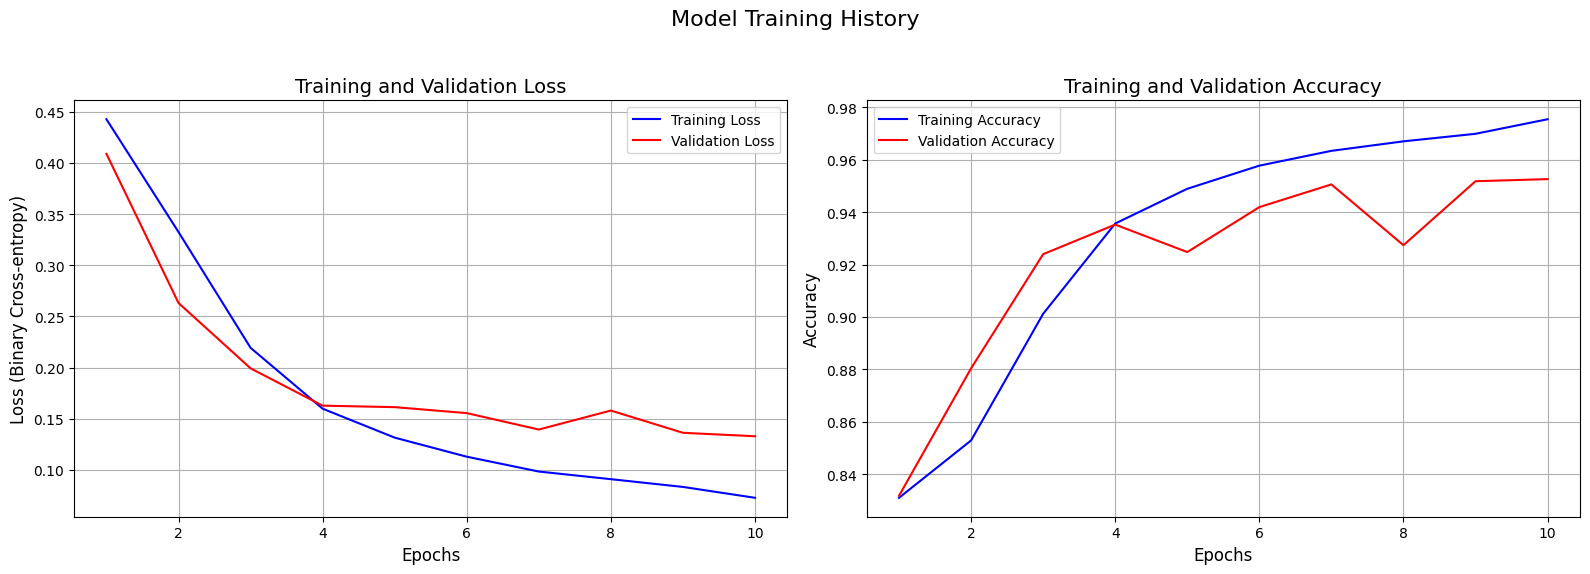

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Training History', fontsize=16)

ax1.plot(epochs, loss, 'b', label='Training Loss')
ax1.plot(epochs, val_loss, 'r', label='Validation Loss')
ax1.set_title('Training and Validation Loss', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss (Binary Cross-entropy)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True)

ax2.plot(epochs, acc, 'b', label='Training Accuracy')
ax2.plot(epochs, val_acc, 'r', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('training_curves.png')

In [ ]:
def classify_comment(comment_text):


    sequence = tokenizer.texts_to_sequences([comment_text])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_LEN, padding='post', truncating='post')

    prediction = model.predict(padded_sequence, verbose=0)[0][0]

    if prediction >= 0.8:
        confidence = f"Confidence: {prediction * 100:.2f}%"
        return f"🚨 HATEFUL / OFFENSIVE COMMENT 🚨\n{confidence}"
    else:
        confidence = f"Confidence: {(1 - prediction) * 100:.2f}%"
        return f"✅ SAFE / NON-HATEFUL COMMENT ✅\n{confidence}"

In [ ]:
iface = gr.Interface(
    fn=classify_comment,
    inputs=gr.Textbox(
        lines=5,
        placeholder="Type a comment here to test your classifier...",
        label="Comment Input"
    ),
    outputs="text",
    title="Hateful Comment Classifier",
    description="Text classification model"
)
iface.launch(
    share=True,
    debug=True
)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1cdd6acefa26dd23ea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1cdd6acefa26dd23ea.gradio.live


In [ ]:
df

,comment,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1
